# Analisis Exploratorio Tp1 (Ariel)

## Imports 

In [6]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Levanto el archivo

In [7]:
%matplotlib inline

plt.style.use('default') # haciendo los graficos un poco mas bonitos en matplotlib
plt.rcParams['figure.figsize'] = (18, 8)

sns.set(style="whitegrid", font_scale = 2) # seteando tipo de grid en seaborn
                                           # seteando tamanio de ticks label
pd.options.display.float_format = '{:20,.2f}'.format # suprimimos la notacion cientifica en los outputs

In [8]:
df = pd.read_csv("train.csv", dtype = {"centroscomercialescercanos" : "bool",
                                       "escuelascercanas" : "bool",
                                       "piscina" : "bool",
                                       "gimnasio" : "bool",
                                       "usosmultiples" : "bool",
                                       "tipodepropiedad" : "category",
                                       "provincia" : "category",
                                       "ciudad" : "category",
                                       "habitaciones" : "float32",
                                       "banos" : "float32",
                                       "garages" : "float32",
                                       "antiguedad" : "float32"})

In [9]:
df["fecha"] = pd.to_datetime(df["fecha"])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240000 entries, 0 to 239999
Data columns (total 23 columns):
id                            240000 non-null int64
titulo                        234613 non-null object
descripcion                   238381 non-null object
tipodepropiedad               239954 non-null category
direccion                     186928 non-null object
ciudad                        239628 non-null category
provincia                     239845 non-null category
antiguedad                    196445 non-null float32
habitaciones                  217529 non-null float32
garages                       202235 non-null float32
banos                         213779 non-null float32
metroscubiertos               222600 non-null float64
metrostotales                 188533 non-null float64
idzona                        211379 non-null float64
lat                           116512 non-null float64
lng                           116512 non-null float64
fecha                      

## Checkeo los datos

In [11]:
df.shape

(240000, 23)

In [12]:
df.count()

id                            240000
titulo                        234613
descripcion                   238381
tipodepropiedad               239954
direccion                     186928
ciudad                        239628
provincia                     239845
antiguedad                    196445
habitaciones                  217529
garages                       202235
banos                         213779
metroscubiertos               222600
metrostotales                 188533
idzona                        211379
lat                           116512
lng                           116512
fecha                         240000
gimnasio                      240000
usosmultiples                 240000
piscina                       240000
escuelascercanas              240000
centroscomercialescercanos    240000
precio                        240000
dtype: int64

In [13]:
aux = df.groupby("tipodepropiedad").count()
aux

,id,titulo,descripcion,direccion,ciudad,provincia,antiguedad,habitaciones,garages,banos,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
tipodepropiedad,,,,,,,,,,,,,,,,,,,,,
Apartamento,57341,56119,57026,47851,57264,57300,48290,56347,53605,56004,...,52779,30035,30035,57341,57341,57341,57341,57341,57341,57341
Bodega comercial,1406,1359,1387,1041,1404,1404,1129,157,881,746,...,1219,696,696,1406,1406,1406,1406,1406,1406,1406
Casa,141717,138518,140729,107582,141479,141620,119026,138379,117756,133108,...,123156,65628,65628,141717,141717,141717,141717,141717,141717,141717
Casa en condominio,19297,18674,19147,15584,19284,19293,16286,19082,16060,18494,...,16657,9733,9733,19297,19297,19297,19297,19297,19297,19297
Casa uso de suelo,708,698,704,525,706,707,616,502,468,551,...,636,414,414,708,708,708,708,708,708,708
Departamento Compartido,141,141,140,141,141,141,134,137,137,134,...,140,66,66,141,141,141,141,141,141,141
Duplex,343,343,343,342,343,343,337,340,336,338,...,343,169,169,343,343,343,343,343,343,343
Edificio,1396,1354,1382,1116,1396,1396,1201,303,873,367,...,1286,802,802,1396,1396,1396,1396,1396,1396,1396
Huerta,20,19,20,18,20,20,18,7,15,8,...,17,4,4,20,20,20,20,20,20,20


In [14]:
#Lotes, hospedajes y garages hay menos de 10 datos, los elimino
#Tambien elimino los que no tienen tipo de propiedad (53 filas en total)
df = df[(df["tipodepropiedad"] != "Lote") | (df["tipodepropiedad"] != "Garage") | (df["tipodepropiedad"] != "Hospedaje")]

## Comienzo el análisis

In [15]:
xhabgb = df.groupby("habitaciones")#Por habitacion group by
xhab = xhabgb.agg({"precio" : ["mean", "std"], "antiguedad" : "mean", "banos" : "mean"}) #Por habitacion Data frame
xhab["cantidad"] = df["habitaciones"].value_counts()

In [16]:
xhab.columns = ["precio_mean", "precio_std", "antiguedad_mean", "banos_mean", "cantidad"]
xhab.reset_index(inplace=True)
xhab["precioxhab_mean"] = xhab["precio_mean"] / xhab["habitaciones"]
xhab

,habitaciones,precio_mean,precio_std,antiguedad_mean,banos_mean,cantidad,precioxhab_mean
0,1.00,"1,806,074.64","1,549,486.15",8.34,1.15,5069,"1,806,074.64"
1,2.00,"1,616,899.96","1,652,561.10",7.62,1.45,57808,"808,449.98"
2,3.00,"2,769,606.78","2,149,011.87",7.30,2.33,121887,"923,202.26"
3,4.00,"3,494,388.63","2,317,473.54",11.32,2.86,25068,"873,597.16"
4,5.00,"3,284,971.94","2,255,098.95",14.64,2.86,4596,"656,994.39"
5,6.00,"3,165,558.67","2,110,282.81",17.31,2.96,1669,"527,593.11"
6,7.00,"3,562,563.99","2,295,234.99",18.09,3.00,539,"508,937.71"
7,8.00,"3,432,464.06","2,178,783.38",18.19,3.12,398,"429,058.01"
8,9.00,"3,936,173.91","2,806,283.55",20.08,3.00,179,"437,352.66"
9,10.00,"4,520,161.52","2,735,238.19",16.53,2.79,316,"452,016.15"


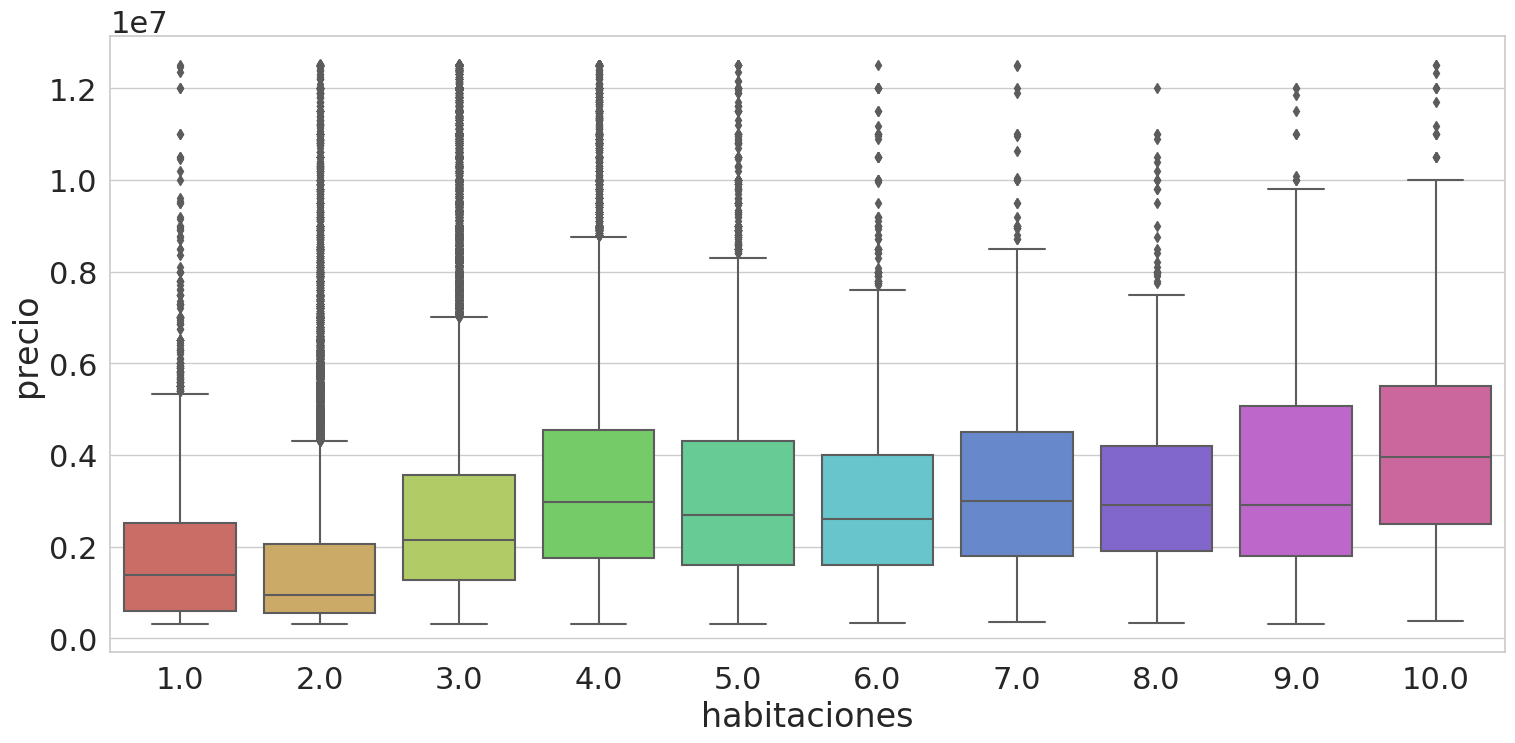

In [17]:
sns.boxplot(x="habitaciones", y="precio", data=df, palette="hls")

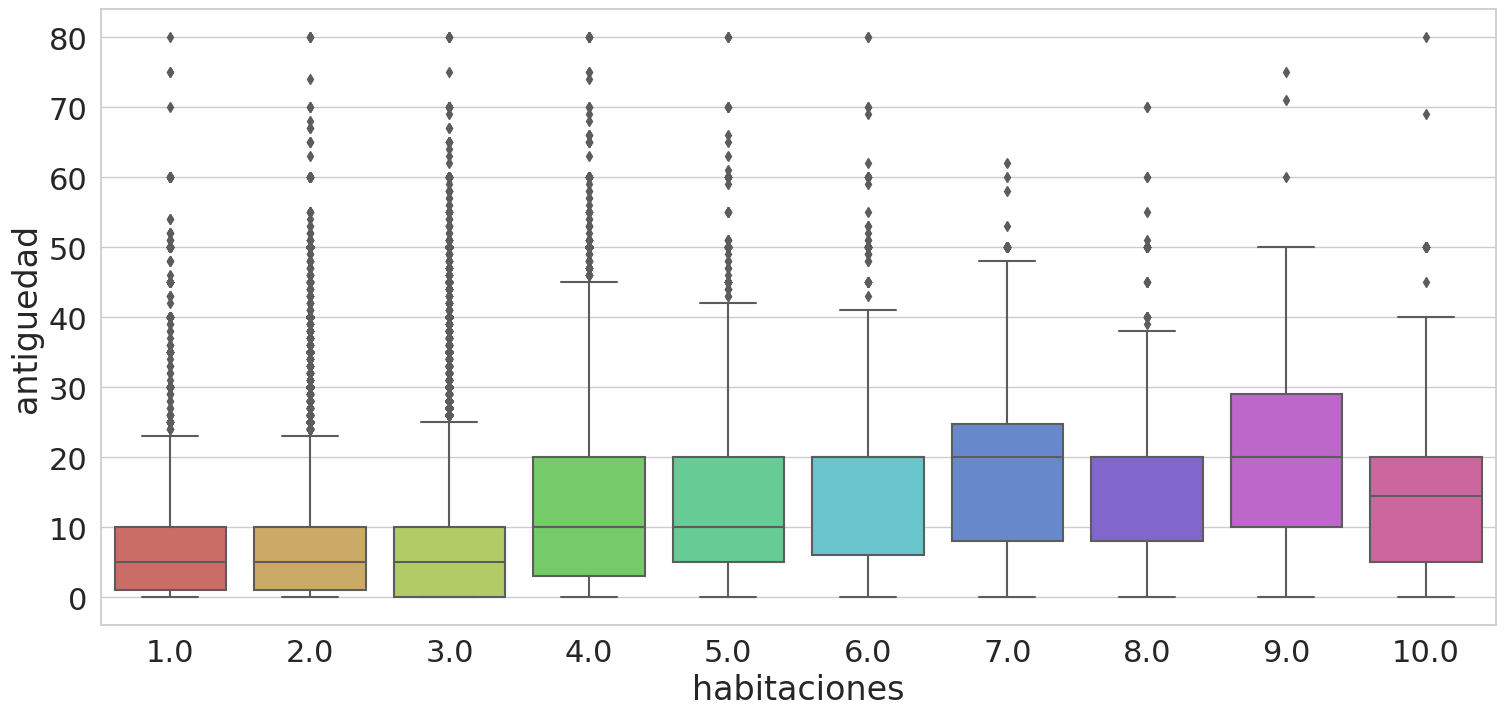

In [18]:
#Separar de a 5
sns.boxplot(x="habitaciones", y="antiguedad", data=df, palette="hls")

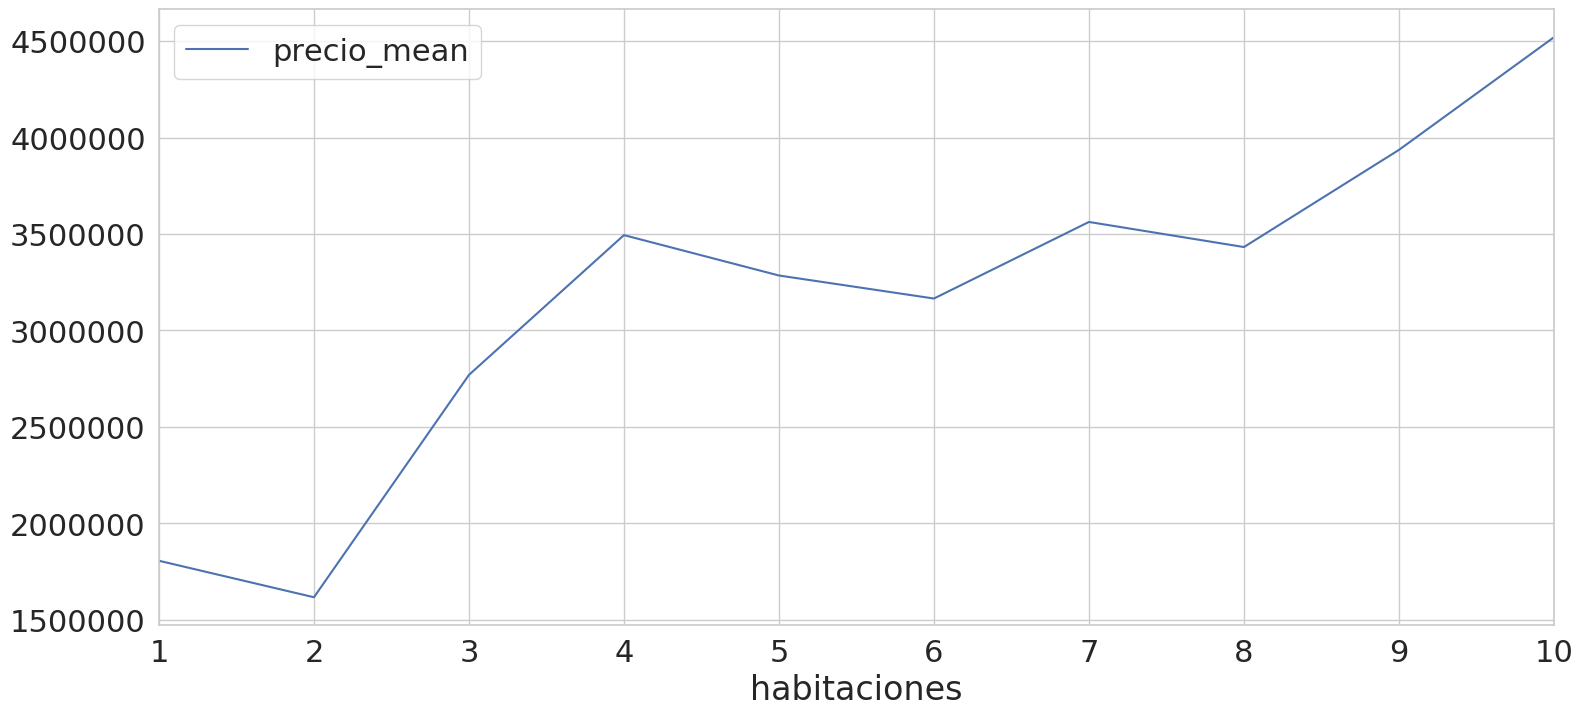

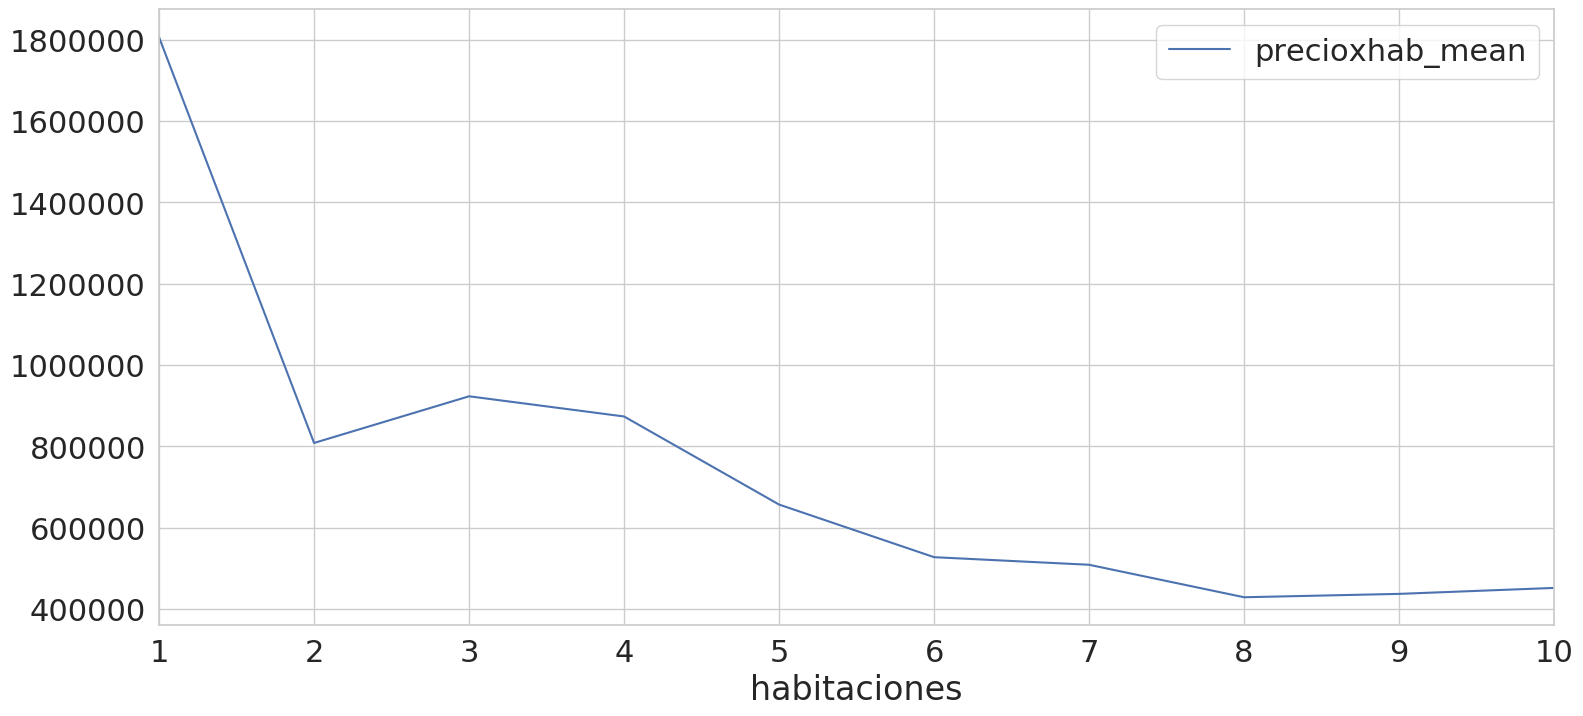

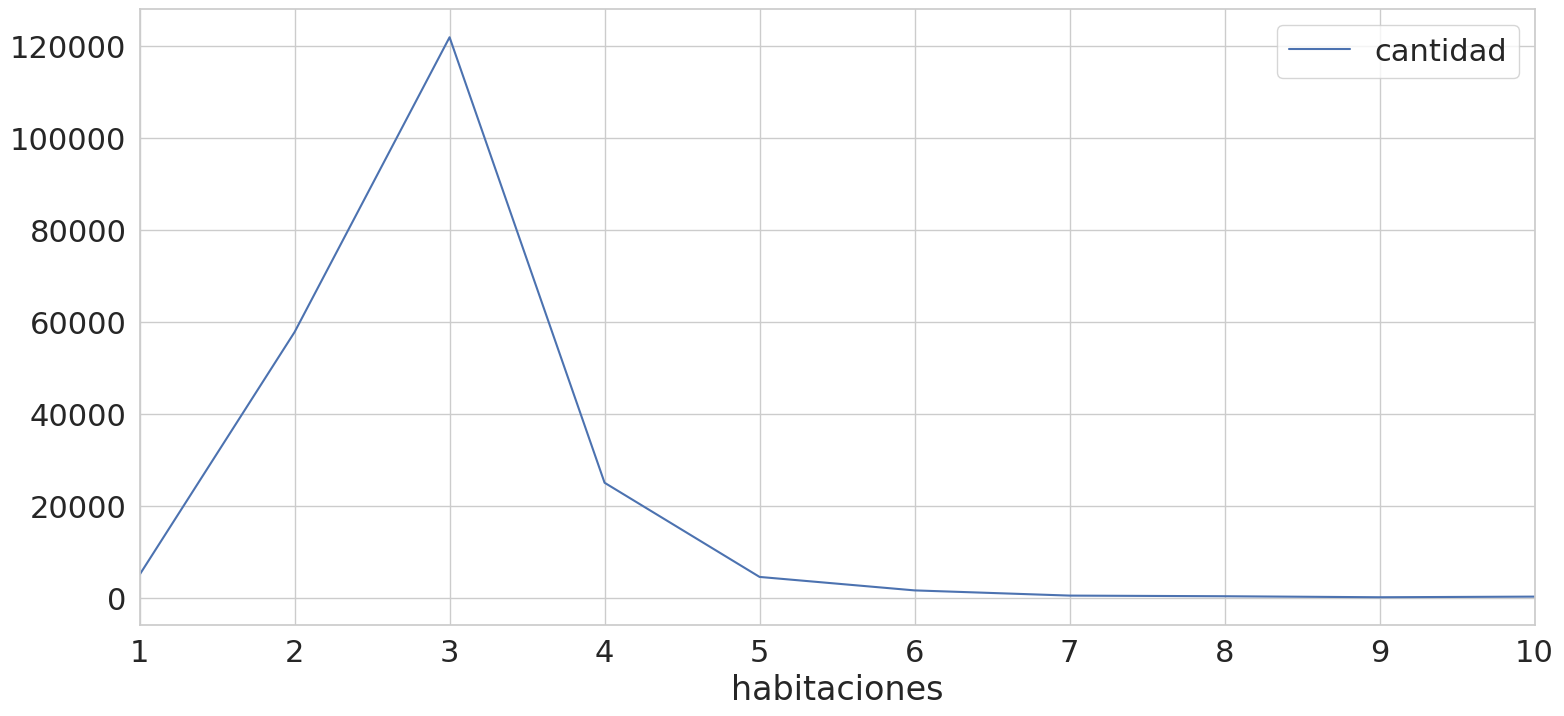

In [19]:
xhab.plot("habitaciones", "precio_mean", kind="line")
xhab.plot("habitaciones", "precioxhab_mean", kind="line")
xhab.plot("habitaciones", "cantidad", kind="line")

In [20]:
frame = xhabgb["tipodepropiedad"].value_counts().to_frame()
frame.columns = ["cantidad"]
frame.reset_index(inplace=True)
frame.pivot(index="habitaciones", columns="tipodepropiedad", values="cantidad")

tipodepropiedad,Apartamento,Bodega comercial,Casa,Casa en condominio,Casa uso de suelo,Departamento Compartido,Duplex,Edificio,Hospedaje,Huerta,...,Local en centro comercial,Nave industrial,Oficina comercial,Otros,Quinta Vacacional,Rancho,Terreno,Terreno comercial,Terreno industrial,Villa
habitaciones,,,,,,,,,,,,,,,,,,,,,
1.00,"2,841.00",47.00,"1,549.00",186.00,12.00,8.00,8.00,11.00,nan,nan,...,12.00,1.00,56.00,6.00,40.00,22.00,111.00,17.00,1.00,30.00
2.00,"30,040.00",42.00,"23,789.00","3,004.00",53.00,61.00,194.00,35.00,nan,5.00,...,8.00,5.00,39.00,31.00,130.00,34.00,127.00,13.00,nan,96.00
3.00,"22,566.00",30.00,"84,651.00","13,608.00",150.00,62.00,109.00,36.00,nan,1.00,...,nan,3.00,66.00,30.00,121.00,56.00,138.00,22.00,nan,134.00
4.00,780.00,18.00,"21,714.00","2,095.00",133.00,2.00,13.00,21.00,nan,1.00,...,nan,3.00,53.00,2.00,49.00,15.00,58.00,11.00,1.00,33.00
5.00,64.00,10.00,"4,179.00",143.00,48.00,nan,9.00,22.00,nan,nan,...,2.00,1.00,35.00,nan,12.00,9.00,23.00,6.00,nan,4.00
6.00,23.00,5.00,"1,458.00",29.00,34.00,2.00,6.00,45.00,nan,nan,...,nan,nan,29.00,nan,6.00,3.00,8.00,2.00,nan,3.00
7.00,6.00,1.00,458.00,5.00,24.00,nan,nan,18.00,1.00,nan,...,nan,nan,13.00,nan,2.00,1.00,4.00,nan,nan,nan
8.00,13.00,3.00,298.00,6.00,16.00,nan,1.00,28.00,nan,nan,...,nan,nan,13.00,nan,1.00,2.00,3.00,nan,nan,3.00
9.00,9.00,1.00,120.00,2.00,9.00,nan,nan,16.00,nan,nan,...,nan,nan,6.00,nan,1.00,nan,1.00,nan,1.00,nan


In [23]:
#frame.plot(x="habitaciones", y="cantidad", kind="")

In [24]:
xpropgb = df.groupby("tipodepropiedad")
xprop = xpropgb.agg({"precio" : "mean", "antiguedad" : "mean", "banos" : "mean"})

In [25]:
xprop["cantidad"] = df["tipodepropiedad"].value_counts()
xprop

,precio,antiguedad,banos,cantidad
tipodepropiedad,,,,
Apartamento,"2,763,768.66",8.36,1.82,57341
Bodega comercial,"2,693,757.70",9.64,1.85,1406
Casa,"2,398,157.71",8.27,2.24,141717
Casa en condominio,"2,898,927.04",6.33,2.37,19297
Casa uso de suelo,"3,732,469.23",18.00,2.40,708
Departamento Compartido,"2,560,161.89",6.15,1.79,141
Duplex,"1,271,757.97",9.85,1.36,343
Edificio,"5,009,499.37",15.89,2.63,1396
Huerta,"3,543,350.00",8.78,1.62,20


In [26]:
xprophab = df.groupby(["tipodepropiedad", "habitaciones"]).agg({"precio" : "mean", "banos" : "mean", "antiguedad" : "mean"})
xprophab

precio                banos  \
tipodepropiedad    habitaciones                                             
Apartamento         1.00                2,185,763.43                 1.12   
                    2.00                2,152,655.55                 1.55   
                    3.00                3,552,820.25                 2.21   
                    4.00                5,387,999.35                 3.18   
                    5.00                4,777,039.06                 3.05   
                    6.00                3,619,130.43                 2.67   
                    7.00                3,323,333.33                 4.00   
                    8.00                2,132,307.69                 3.30   
                    9.00                3,265,555.56                 2.67   
                   10.00                9,023,264.20                 3.00   
Bodega comercial    1.00                2,161,693.34                 1.34   
                    2.00                2,498,761.90                 1.87   
                    3.00                2,227,066.67                 1.84   
                    4.00                3,036,777.78                 2.40   
                    5.00                2,797,000.00                 2.29   
                    6.00                6,720,000.00                 3.40   
                    7.00               11,000,000.00                 1.00   
                    8.00                2,783,333.33                 1.00   
                    9.00                1,400,000.00                 3.00   
Casa                1.00                1,056,945.90                 1.17   
                    2.00                  970,532.57                 1.32   
                    3.00                2,507,186.25                 2.34   
                    4.00                3,345,206.75                 2.82   
                    5.00                3,191,259.16                 2.86   
                    6.00                3,022,015.15                 2.95   
                    7.00                3,375,650.63                 3.01   
                    8.00                3,330,438.55                 3.14   
                    9.00                3,585,876.08                 2.94   
                   10.00                3,591,047.36                 2.89   
Casa en condominio  1.00                1,085,841.67                 1.13   
...                                              ...                  ...   
Rancho              7.00                3,900,000.00                  nan   
                    8.00                4,900,000.00                 3.00   
Terreno             1.00                2,403,153.86                 1.24   
                    2.00                2,599,657.48                 1.38   
                    3.00                3,748,176.16                 2.02   
                    4.00                3,794,219.31                 2.08   
                    5.00                4,285,543.48                 2.67   
                    6.00                5,553,750.00                 3.50   
                    7.00                3,000,000.00                 2.50   
                    8.00                4,083,333.33                 3.00   
                    9.00                1,300,000.00                 2.00   
                   10.00                3,824,000.00                 1.50   
Terreno comercial   1.00                3,400,000.00                 1.38   
                    2.00                3,069,923.08                 1.36   
                    3.00                3,907,404.55                 1.86   
                    4.00                4,562,727.27                 2.45   
                    5.00                5,075,000.00                 3.25   
                    6.00                4,275,000.00                 2.50   
                   10.00                9,500,000.00                  nan   
Terreno industrial  1.00                  

In [27]:
xprovgb = df.groupby("provincia")
xprov = xprovgb.agg({"precio" : "mean", "antiguedad" : "mean", "banos" : "mean"})
xprov["cantidad"] = df["provincia"].value_counts()
xprov.reset_index(inplace=True)
xprov

,provincia,precio,antiguedad,banos,cantidad
0,Aguascalientes,"1,477,188.77",7.52,2.12,1753
1,Baja California Norte,"767,441.75",5.79,1.37,3220
2,Baja California Sur,"1,216,452.82",2.46,1.61,1700
3,Campeche,"1,570,917.82",3.91,1.96,263
4,Chiapas,"1,924,125.72",5.41,2.21,1126
5,Chihuahua,"1,744,530.61",6.52,2.13,4590
6,Coahuila,"1,505,305.45",6.31,2.14,3695
7,Colima,"1,531,380.16",5.67,2.04,1008
8,Distrito Federal,"3,471,705.09",12.19,1.99,58790
9,Durango,"1,210,388.98",4.99,1.95,2275


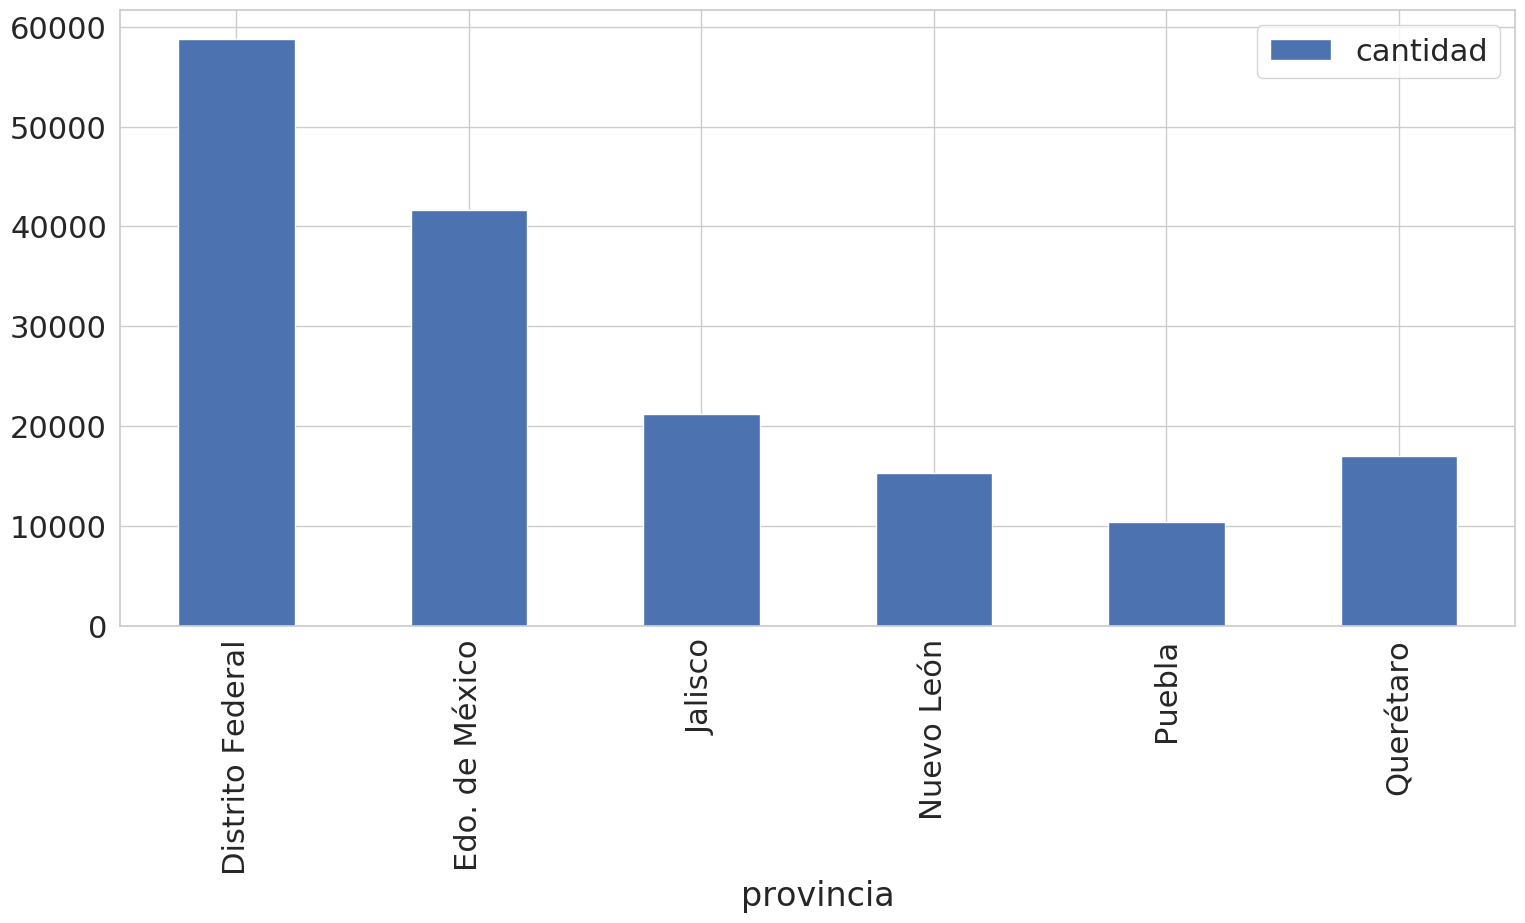

In [28]:
xprovmax = xprov.loc[(xprov["cantidad"] >= 10000)]
xprovmax.plot(x="provincia", y="cantidad", kind="bar")
plt.show()